<a href="https://www.kaggle.com/code/chrisw1212/exploratory-data-analysis?scriptVersionId=162293075" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis of Supermarket Sales Data

## Introduction

The goal of this project is to engage in exploratory data analysis of supermarket sales data. 

Data analysis will be used to answer questions such as:

1) What is the average purchase total of a customer's cart?

2) What does the distribution of customer ratings look like?

3) Do members tend to spend more money than non-members?

4) What is the best selling product line? 

5) How do sales fluctuate over the days of the week? Which day of the week has the highest sales?

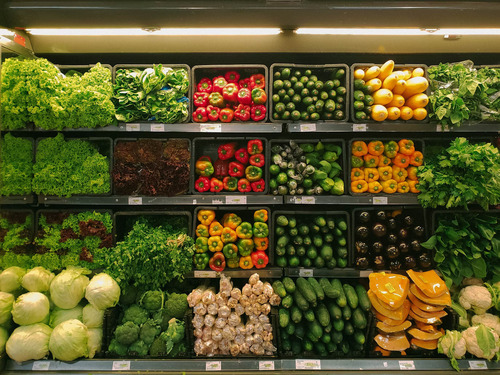

## Supermarket Dataset

For this project, I will use a public dataset of historical supermarket sales data: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/ 

The dataset contains 3 months of historical sales data for 3 different branches of a supermarket company in Myanmar. The sales data was recorded from January 2019 to March 2019.

The dataset has:

<b>1000 rows</b> - each row represents a different supermarket transaction

<b>17 columns</b>


|       Column Name       | Data Type | Description |
| :---------------------- | :--------: | :---------- |
| Invoice ID              | object  | Computer generated sales slip invoice identification number |
| Branch                  | object       | Branch of supercenter (3 branches are available identified by A, B and C)           |
| City                    | object       | The city the supermarket is located in         |
| Customer type           | object      | If customer used member card, type is "Members", otherwise "Normal"         |
| Gender                  | object       | Gender of customer           |
| Product line            | object       | General item categories - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel           |
| Unit price              | float64 | Price of each product in $           |
| Quantity                | int64       | Number of products purchased by customer          |
| Tax                     | float64      | 5% tax fee for customer buying          |
| Total                   | float64       | Total price including tax           |
| Date                   | object       | Date of purchase (Record available from January 2019 to March 2019)           |
| Time                    | object       | Purchase time (10am to 9pm)           |
| Payment                 | object       | Payment used by customer for purchase (3 methods are available – Cash, Credit card, and Ewallet)           |
| cogs              | int       | Cost of goods sold           |
| gross margin percentage | float64       | Gross margin percentage           |
| gross income            | float64       | Gross income          |  
| Rating                  | float64       | Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)           |  



## Import Python Libraries

In [1]:
# Numerical Operations and Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warning Suppression for Readability
import warnings

## Import the Supermarket Sales Dataset

In [2]:
# Convert CSV file to a Pandas DataFrame object
sales_df = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

## Initial Data Exploration
Let's start by examining the first 10 rows of the data

In [3]:
sales_df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


Next, we'll look at the columns. 

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

There are 1000 rows in this dataset. None of the columns have missing values, so we don't need to address null values.

The date column might consist of strings. Let's take a closer look. 

In [5]:
# Examine the Date column to determine type of object
sales_df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

The Date column is currently storing the date of transactions as string objects. Converting the dates from string objects to datetime objects will allow us to more easily sort and filter transactions by date, perform time series analysis, and visualize sales metrics over time. 

In [6]:
# Convert the Date column to datetime objects
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Examine the Date column again to confirm successful conversion
sales_df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

The data type is now listed as datetime64, as expected.

Let's use the Date column as the new index and sort from earliest to latest transaction date.

In [7]:
# Use date as new index
sales_df.set_index('Date', inplace = True)

# Sort the transactions from earliest to latest
sales_df.sort_index(inplace = True)

# Confirm that changes were successful
sales_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7


The previous index column has been successfully replaced by the Date column. We see that there are now 16 columns instead of the original 17. The dates are also correctly sorted from 2019-01-01 to 2019-03-30.

Let's also add a column with day of the week for later time series analysis.

In [8]:
# Add a new column with the day of the week
sales_df['day_of_week'] = sales_df.index.dayofweek

# Map numerical day of the week to actual day names 
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
sales_df['day_of_week'] = sales_df['day_of_week'].map(day_map)

# Confirm column was added successfully
sales_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,day_of_week
Date,,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7,Saturday


Let's examine branch and city frequencies.

In [9]:
# Determine the number of transactions that occurred at each branch
sales_df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

Branch A had 340 transactions, Branch B had 332 transactions, and Branch C had 328 transactions.

In [10]:
# Determine the number of transactions that occurred in each city of Myanmar
sales_df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Yangon had 340 transactions, Mandalay had 332 transactions, and Naypyitaw had 328 transactions.

Branch A of the supermarket is in Yangon, Branch B is in Mandalay, and Branch B is in Naypyitaw.

Let's calculate some summary statistics for the dataset.

In [11]:
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


#### Observations

1) The average customer rating was 6.97270 out of 10. The minimum rating was 4.00000 and the maximum was 10.00000. 

2) Supermarket customers had an average of 5.51 items in their cart. The minimum was 1 item and the maximum was 10 items.

3) Since the supermarkets were in Myanmar, we might infer that the local currency was the Myanmar Kyat (Ks.). However, the US dollar ($) is also used. An average of 5 items at a supermarket costing an average of 322 units of currency strongly suggests the Myanmar Kyat is the answer. 

4) A supermarket transaction had an average cost of Ks. 322.966749/-, a minimum cost of Ks. 10.678500/-, and a maximum cost of Ks. 1042.650000/-.

#### Some columns have issues
There seem to be a few points to note with the unit price, cogs, gross margin percentage, and gross income columns. Each column is derived by calculations using the Total, Tax 5%, and Quantity columns. 

&nbsp; a)<b> Unit price:</b> The unit price is normally the price per individual item. In the context of an entire cart of different items, the unit price 
    is really referring to the average price per item paid by the customer before tax. Thus ->
    <br><br>Unit price = (Total - Tax 5%) / (Quantity)
    
&nbsp;b)<b> cogs:</b> The cogs (cost of goods sold) column is not referring to the cost of goods paid by the store to obtain items and stock their shelves, but rather the pre-tax subtotal price for all items in a customer's cart. Thus ->
    <br><br>cogs = (Total - Tax 5%)
    <br><br> However, cogs is erroneously being used to calculate the next two columns based upon being the cost of goods paid by the store to obtain items. 
    
 &nbsp;c)<b> gross income:</b> The gross income would normally be -> <br><br>gross income = (total paid by customer) - (cost to obtain goods). <br><br>However, the calculation in this dataset is subtracting the cogs column from the total column. Since cogs is actually the pre-tax total price, taking total - cogs is really just the tax 5% value. The column is based on an incorrect calculation because the cogs column is not actually referring to the cost of goods paid by the supermarket.
    
 &nbsp;d)<b> gross margin percentage:</b> The gross margin percentage appears odd. Every single column has the same value. Typically, the gross margin percentage would be -> <br><br>gross margin percentage = ((gross income) / (total paid by the customer)) * 100. <br><br>However, the fact the the cogs column is not actually referring to the cost paid by the supermarket for goods means that this column also has an error. 
 
In this case, we cannot contact the database owner for the correct values for the cogs column. We can still use the dataset to generate insights. The cost of goods is crucial to find gross income and gross margin percentage, and I do not have a way of finding the cost of goods. I will therefore remove the gross income and gross margin percentage columns. I will also rename the cogs column to "pre-tax total" to better describe its actual values.

## Data Cleaning

We have already determined that no missing values were found in the dataset. Before we remove columns, we will first check for duplicates. 

In [12]:
# Count number of duplicate rows 
sales_df.duplicated().sum()

0

With 17 columns of values, no duplicates were found. Next, we will remove the two columns with erroneous calculations.

In [13]:
# Remove columns with incorrect calculations
corrected_sales_df = sales_df.drop(['gross income', 'gross margin percentage'], axis=1)

# Confirm column removal was successful
corrected_sales_df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday


Let's rename the cogs column to the "Pre-tax total" column.

In [14]:
# Rename column to more accurate description
corrected_sales_df.rename(columns={'cogs': 'Pre-tax total'}, inplace = True)

# Confirm column renaming was successful
corrected_sales_df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,Pre-tax total,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday


The "Ewallet" value in the Payment column should really be "E-wallet".

In [15]:
# Update spelling of payment method
corrected_sales_df['Payment'] = corrected_sales_df['Payment'].replace("Ewallet", "E-wallet")

# Confirm the update
corrected_sales_df['Payment'].unique()

array(['Cash', 'E-wallet', 'Credit card'], dtype=object)

## Data Analysis


### What is the overall customer rating for the supermarket company? 

<br>Let's start by looking at the frequency for different customer ratings. We'll create a histogram for ratings across all 3 branches of the supermarket. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


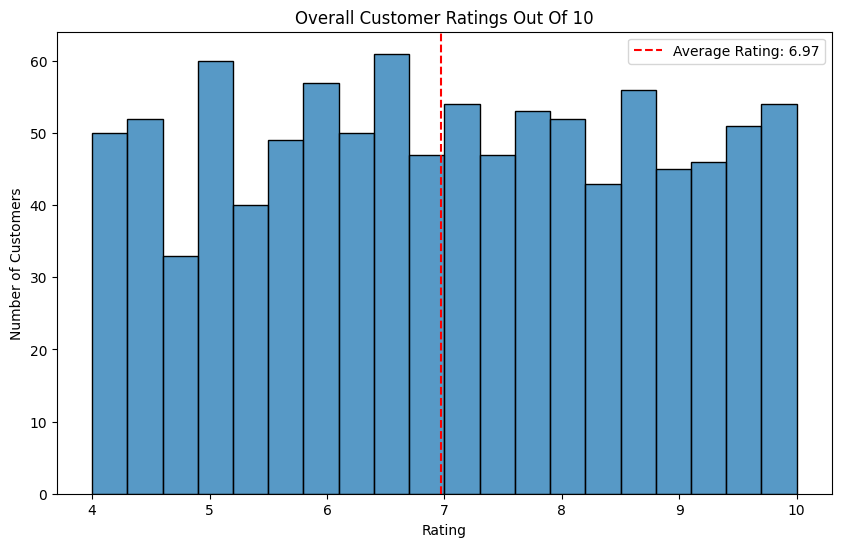

In [16]:
# Create a histogram of overall customer ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=corrected_sales_df, x='Rating', bins=20)

# Set title and labels for x-axis and y-axis
plt.title('Overall Customer Ratings Out Of 10')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')

# Add the average rating as a vertical dashed line to the histogram
average_rating = corrected_sales_df['Rating'].mean()
plt.axvline(x=average_rating, color='red', linestyle='--', label='Average Rating: {:.2f}'.format(average_rating))
plt.legend()

# Suppress specific warning for readability reasons
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

# Display the histogram
plt.show()

* There is a fairly even distribution of ratings from 4 - 10
* The overall average rating was 6.97 out of 10
* Although this data is historical, customer surveys could have been used to help identify the most common issues faced by customers

### How do customer ratings compare across the 3 supermarket branches?

Now, let's examine each of the 3 branches of the supermarket to view their individual distributions of ratings. Is there a particular branch with lower customer satisfaction?
Recall that Branch A of the supermarket is in Yangon, Branch B is in Mandalay, and Branch B is in Naypyitaw.

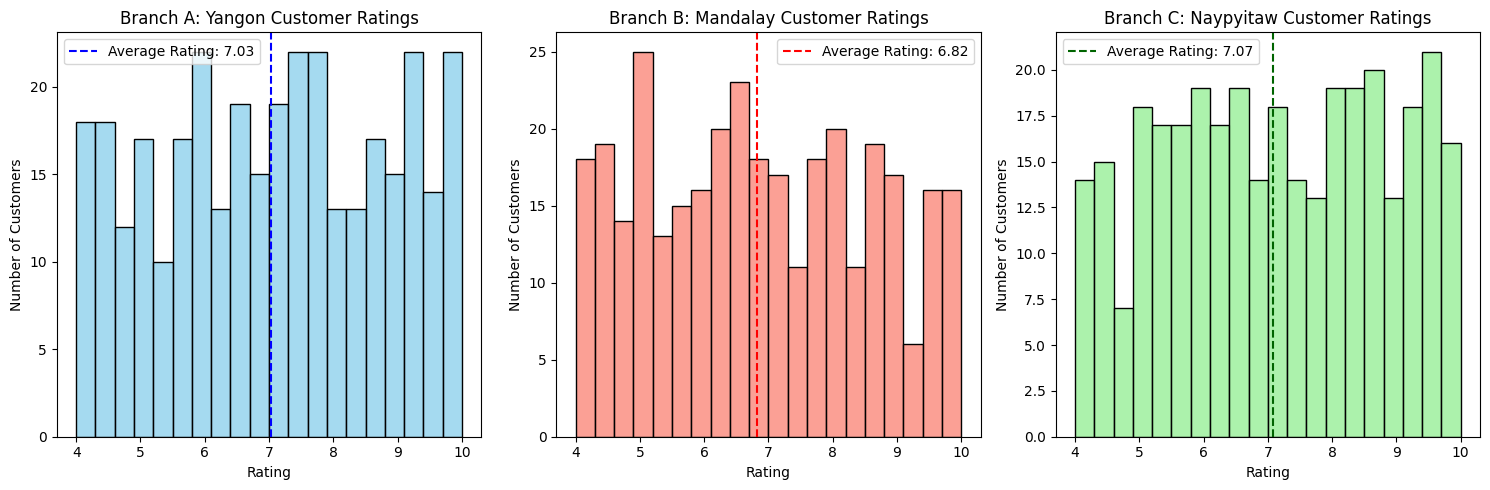

In [17]:
# Create subsets of the data for each branch using Boolean masks
yangon_df = corrected_sales_df[corrected_sales_df['City'] == 'Yangon']
mandalay_df = corrected_sales_df[corrected_sales_df['City'] == 'Mandalay']
naypyitaw_df = corrected_sales_df[corrected_sales_df['City'] == 'Naypyitaw']

# Set up 3 histograms side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.histplot(data=yangon_df, x='Rating', bins=20, ax=axes[0], color='skyblue')
sns.histplot(data=mandalay_df, x='Rating', bins=20, ax=axes[1], color='salmon')
sns.histplot(data=naypyitaw_df, x='Rating', bins=20, ax=axes[2], color='lightgreen')

# Set titles, x-axis labels, and y-axis labels
axes[0].set_title('Branch A: Yangon Customer Ratings')
axes[1].set_title('Branch B: Mandalay Customer Ratings')
axes[2].set_title('Branch C: Naypyitaw Customer Ratings')
axes[0].set_xlabel('Rating')
axes[1].set_xlabel('Rating')
axes[2].set_xlabel('Rating')
axes[0].set_ylabel('Number of Customers')
axes[1].set_ylabel('Number of Customers')
axes[2].set_ylabel('Number of Customers')

# Add the average rating as a vertical dashed line to the 3 histograms
yangon_average_rating = yangon_df['Rating'].mean()
mandalay_average_rating = mandalay_df['Rating'].mean()
naypyitaw_average_rating = naypyitaw_df['Rating'].mean()
axes[0].axvline(x=yangon_average_rating, color='blue', linestyle='--', label='Average Rating: {:.2f}'.format(yangon_average_rating))
axes[1].axvline(x=mandalay_average_rating, color='red', linestyle='--', label='Average Rating: {:.2f}'.format(mandalay_average_rating))
axes[2].axvline(x=naypyitaw_average_rating, color='darkgreen', linestyle='--', label='Average Rating: {:.2f}'.format(naypyitaw_average_rating))
axes[0].legend()
axes[1].legend()
axes[2].legend()

# Arrange the subplots neatly
plt.tight_layout()

# Display the 3 histograms
plt.show()

* The rating distributions are relatively similar across all three supermarket branches in different cities
* The difference in average ratings between supermarket branches is relatively small. The highest rating was 7.07 / 10 in Naypyitaw. The lowest was 6.82 in Mandalay. There is not a single branch that seems to have disproportionately low ratings.


### What percentage of transactions were made using a member's card?

We can easily create a pie chart to help answer this question.

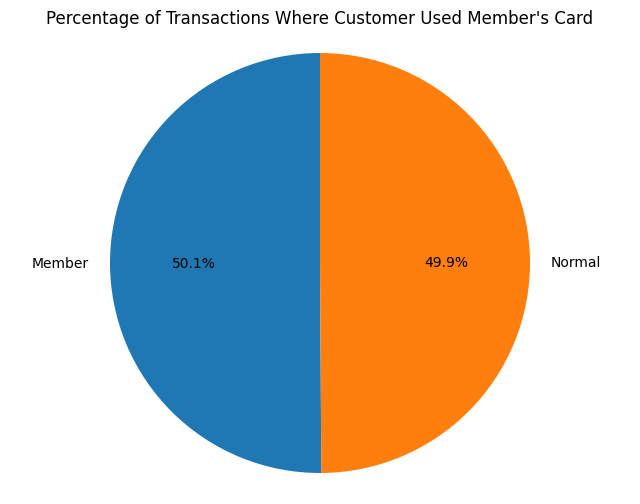

In [18]:
# Find the percentages for "Member" customers vs "Normal" customers
customer_type_counts = corrected_sales_df['Customer type'].value_counts(normalize = True)

# Create a pie chart to visualize the results
plt.figure(figsize=(8, 6))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Transactions Where Customer Used Member\'s Card')
plt.axis('equal')

# Display the pie chart
plt.show()

* There is a roughly even split of transactions involving a member's card versus those which did not. 
* 50.1% of transactions used a member's card and 49.9% did not.

### Do customers who use a member's card spend more money on average than non-members?

<br>Answering this question can help determine if the company should invest resources into increasing their membership count.

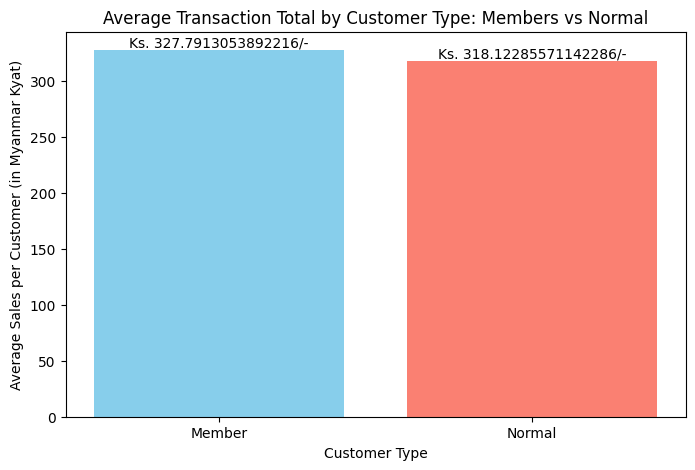

In [19]:
# Create subsets of the data for each customer type using Boolean masks
member_df = corrected_sales_df[corrected_sales_df['Customer type'] == 'Member']
normal_df = corrected_sales_df[corrected_sales_df['Customer type'] == 'Normal']

# Find average sales per customer type
avg_sales_per_member_customer = member_df['Total'].mean()
avg_sales_per_normal_customer = normal_df['Total'].mean()

# Set up a bar plot
values = [avg_sales_per_member_customer, avg_sales_per_normal_customer]
plt.figure(figsize=(8, 5))
bars = plt.bar(['Member', 'Normal'], values, color=['skyblue', 'salmon'])

# Add title, x-axis label, and y-axis label
plt.xlabel('Customer Type')
plt.ylabel('Average Sales per Customer (in Myanmar Kyat)')
plt.title('Average Transaction Total by Customer Type: Members vs Normal')

# Add labels for average sales values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'Ks. {value}/-', ha='center', va='bottom')

# Show the plot
plt.show()

* More money was spent in transactions involving a member's card than transactions without a member's card
* If the customer used a member's card, the average transaction total was about Ks. 327.79/-
* If the customer did not use a member's card, the average transaction total was about Ks. 318.12/-
* The difference is relatively small


### How common are each of the payment methods?

Let's next examine which payment method is most often used for supermarket transactions.

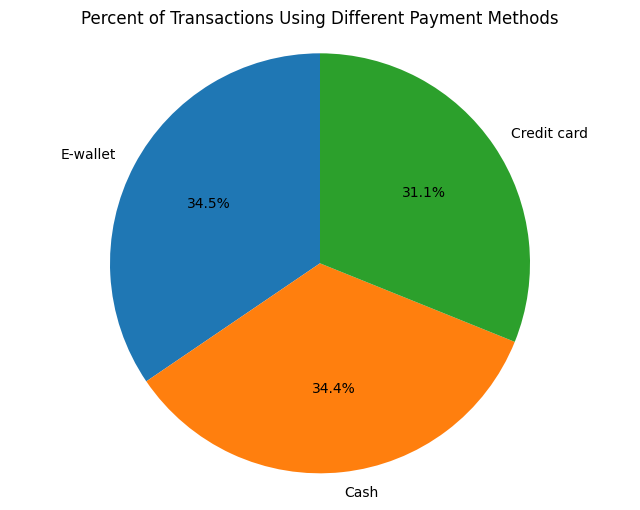

In [20]:
# Find the percentages for payment types
payment_type_counts = corrected_sales_df['Payment'].value_counts(normalize = True)

# Create a pie chart to visualize the results
plt.figure(figsize=(8, 6))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percent of Transactions Using Different Payment Methods')
plt.axis('equal')

# Display the pie chart
plt.show()

* There was a fairly even split between the use of E-wallets, cash, and credit cards.
* E-wallets were used in 34.5% of transactions, cash was used in 34.4% of transactions, and credit cards were used in 31.1% of transactions.
* Providing support for multiple payment options helps to improve the customer experience.

### Which of the 3 branches of the supermarket had the highest total sales?

<br>Now, we can find out if one of the supermarket branch locations had significantly higher sales than other locations.

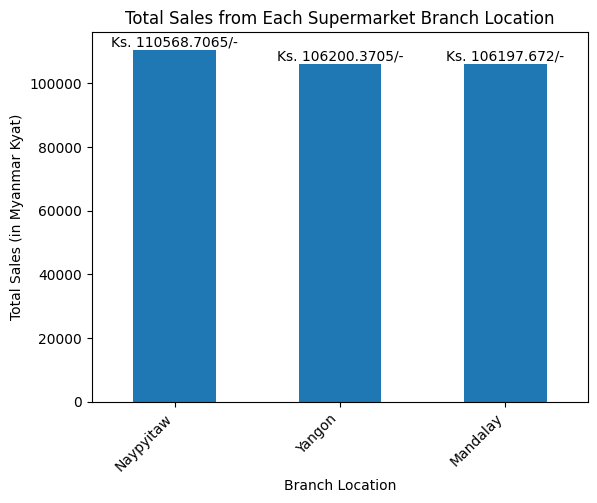

In [21]:
# Create a DataFrame with total revenue grouped by city
location_totals_df = corrected_sales_df.groupby('City').sum('Total')

# Isolate the summed 'Total' column and sort from highest to lowest
location_totals = location_totals_df['Total'].sort_values(ascending=False)

# Create a bar plot visualization
ax = location_totals.plot.bar()

# Add axis labels and title
plt.title('Total Sales from Each Supermarket Branch Location')
plt.xlabel('Branch Location')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Total Sales (in Myanmar Kyat)')

# Add total transaction amount labels
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'Ks. {bar.get_height()}/-', ha='center', va='bottom')

# Show the plot
plt.show()

* The total sales for each branch location were close together.
* The Naypyitaw location had the highest total sales with Ks. 110568.7065/-. The lowest revenue of Ks. 106197.672/- in Mandalay was very close to the highest amount.

### Which product lines drove the highest sales? Which were the most common?

<br>Now we can turn our attention to product lines. If a particular product line is a significant driver of sales, the company can consider investing more into that product line. The company can also address lower performing product lines. 

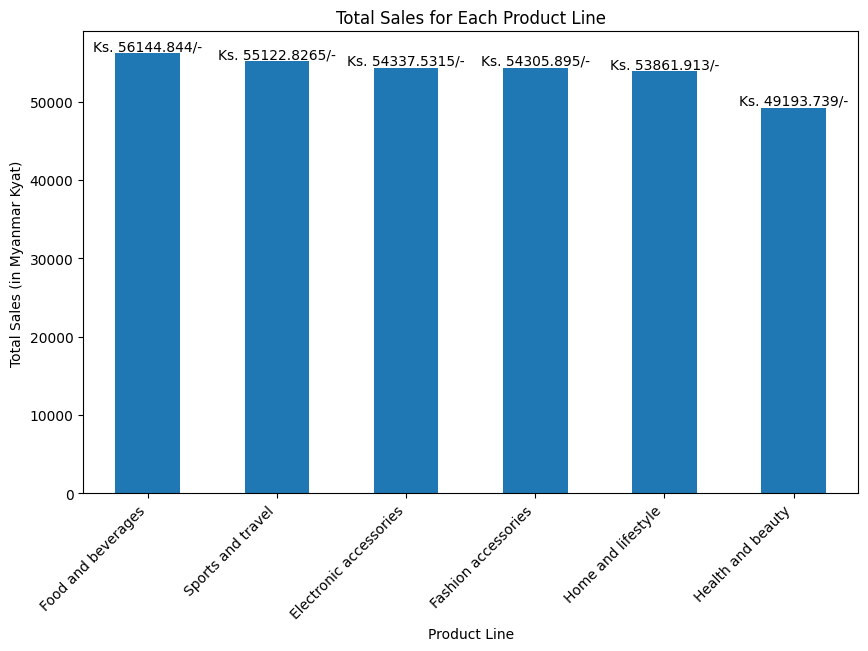

In [22]:
# Create a DataFrame with total revenue grouped by city
product_line_totals_df = corrected_sales_df.groupby('Product line').sum('Total')

# Isolate the summed 'Total' column and sort from highest to lowest
product_line_totals = product_line_totals_df['Total'].sort_values(ascending=False)

# Create a bar plot visualization
plt.figure(figsize=(10, 6))
ax = product_line_totals.plot.bar()

# Add axis labels and title
plt.title('Total Sales for Each Product Line')
plt.xlabel('Product Line')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Total Sales (in Myanmar Kyat)')

# Add total transaction amount labels
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'Ks. {bar.get_height()}/-', ha='center', va='bottom')

# Show the plot
plt.show()

* "Food and Beverages" was the top selling product line with Ks. 56144.844/- in sales. 
*  The next few product lines of "sports and travel", "electronic accessories", "fashion accessories", and "Home and lifestyle" had similar total sales
* "Health and Beauty" was the lowest selling product line with Ks. 49193.739/- in sales. 

### How did product lines perform among different gender categories?

<br>We can start by examining the gender categories in this dataset.

In [23]:
# Find the number of transactions made by each gender category
corrected_sales_df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

The dataset contains 501 transactions made by females and 499 transactions made by males.

Now let's compare product line popularity between women and men.

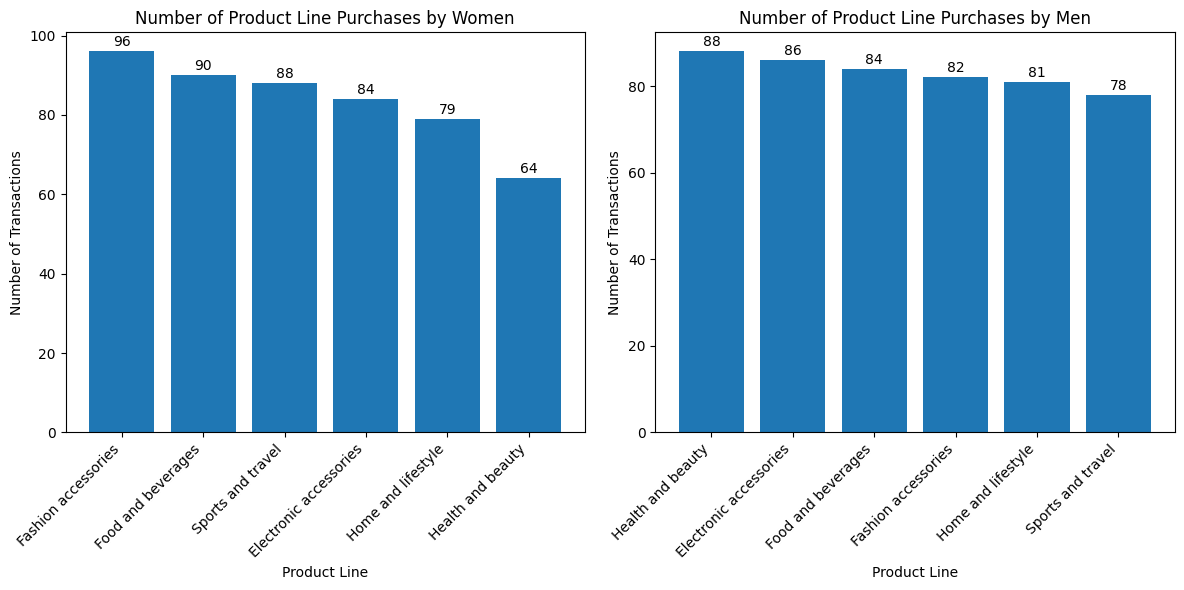

In [24]:
# Create separate DataFrames for transactions by men and women
women_df = corrected_sales_df[corrected_sales_df['Gender'] == 'Female']
men_df = corrected_sales_df[corrected_sales_df['Gender'] == 'Male']

# Isolate product line data for men and women
women_product_line_counts = women_df['Product line'].value_counts()
men_product_line_counts = men_df['Product line'].value_counts()

# Plot the first bar chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].bar(women_product_line_counts.index, women_product_line_counts.values)
axes[0].set_title('Number of Product Line Purchases by Women')
axes[0].set_xlabel('Product Line')
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_ylabel('Number of Transactions')

# Add total number of transaction labels for first bar chart
for bar in axes[0].patches:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')

# Plot the second bar chart
axes[1].bar(men_product_line_counts.index, men_product_line_counts.values)
axes[1].set_title('Number of Product Line Purchases by Men')
axes[1].set_xlabel('Product Line')
axes[1].set_xticks(axes[0].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylabel('Number of Transactions')

# Add total number of transaction labels for second bar chart
for bar in axes[1].patches:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

* Women and men were roughly equally represented in the dataset. 
* The "Fashion accessories" product line was most popular with women with 96 transactions. It was 4th popular for men with 82 transactions.
* The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health and Beauty" was least popular with women at 64 transactions. 
* The number of transactions for each product line is very similar for men. The most common "Health and Beauty" had 88 transactions and the least common "Sports and Travel" had 78 transactions. 
* The number of transactions for each product line varies more for women. The most common "Fashion Accessories" had 96 transactions and the least common "Health and Beauty" had 64 transactions.

### How did the sales data fluctuate over time?

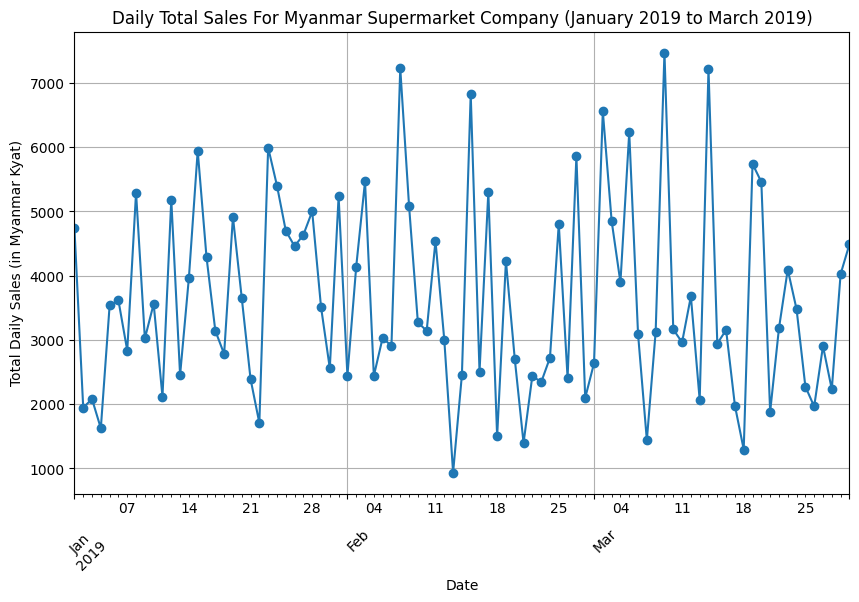

In [25]:
# Group data by date and calculate total sales for each day
daily_sales = corrected_sales_df.groupby('Date')['Total'].sum()  

# Plot the line chart
plt.figure(figsize=(10, 6))
daily_sales.plot(marker='o', linestyle='-')

# Add labels and title
plt.title('Daily Total Sales For Myanmar Supermarket Company (January 2019 to March 2019)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Total Daily Sales (in Myanmar Kyat)')

# Show the plot
plt.grid(True)  # Add grid lines for readability
plt.show()

* The daily totals tend to fluctuate a fair amount. 
* The day with the lowest sales, February 13th, 2019, was a Wednesday. 
* The day with the highest sales, March 9th, 2019, was a Saturday.

One hypothesis might be that weekends tend to have higher sales than weekdays. Let's check that hypothesis.

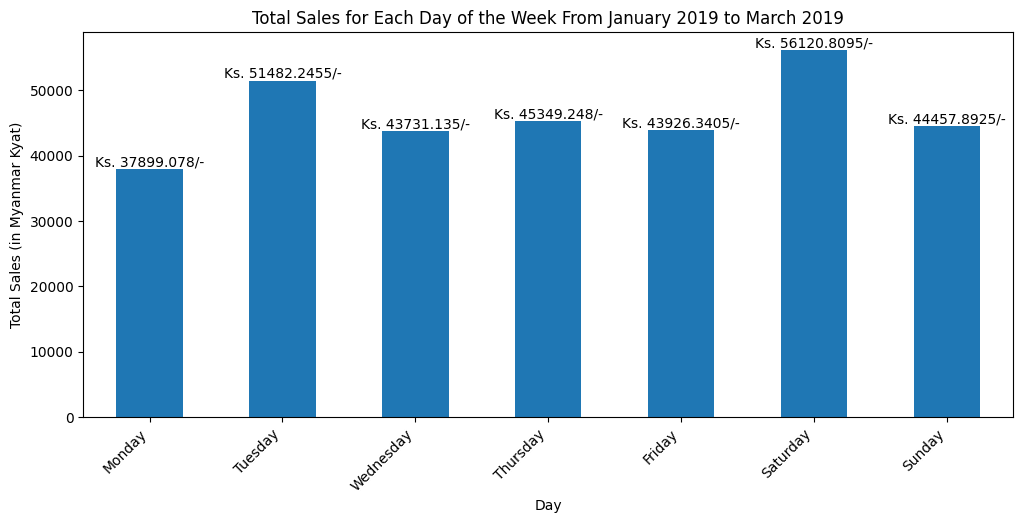

In [26]:
# Create a Series of the total sales for each day of the week for the entire 3 month period
day_of_week_totals = corrected_sales_df.groupby('day_of_week')['Total'].sum()

# Rearrange the order of the days to a more common format for a bar plot
day_of_week_totals = day_of_week_totals.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a bar plot visualization
plt.figure(figsize=(12, 5))
ax = day_of_week_totals.plot.bar()

# Add axis labels and title
plt.title('Total Sales for Each Day of the Week From January 2019 to March 2019')
plt.xlabel('Day')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Total Sales (in Myanmar Kyat)')

# Add total transaction amount labels
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'Ks. {bar.get_height()}/-', ha='center', va='bottom')

# Show the plot
plt.show()

* The best day of the week for sales during the time period was Saturday with a combined Ks. 56,120.8095/-
* The worst day of the week for sales during the time period was Monday with a combined Ks. 37899.078/-
* Surprisingly, Tuesday was the day with the second highest sales. 
* Sunday, Wednesday, Thursday, and Friday all had similar sales. 

## Conclusion
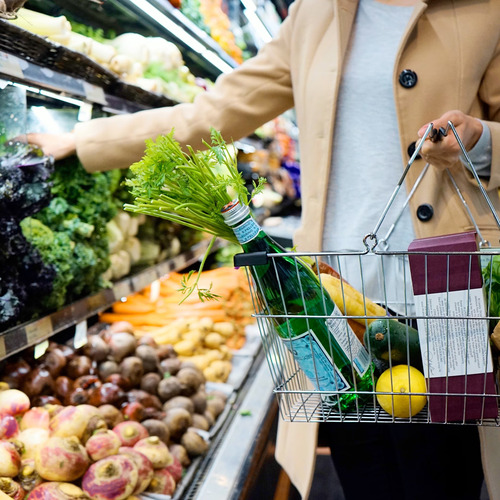

I examined three months of historical supermarket data from 2019 in Malaysia to discover insights.


### Data Limitations

* I found an issue with the "cost of goods sold" (cogs) column in the dataset. Normally, the cost of goods sold means the price paid to obtain goods and stock shelves by the company. However, in the dataset, the column was actually referring to the pre-tax total for customers. Therefore, the "gross income" and "gross margin percentage" columns contained incorrect calculations since they include the cost of goods sold. I excluded these columns from further analysis.
* Obtaining the actual cost of goods sold would allow for further analysis of overall gross income and gross margin percentage by the company. I would also be able to compare each supermarket branch location to determine relative performance.
* The dataset is from January 2019 to March 2019. A longer, more recent timeframe of data with more columns could be used to track fluctuations in sales as influenced by weather, economic conditions, and holidays. 

### Insights

#### Average Customer Cart Quantity and Total Cost
* The average number of items in a customer's cart was 5.5. The minimum was 1 and the maximum was 10. 
* A supermarket transaction had an average cost of Ks. 322.966749/-, a minimum cost of Ks. 10.678500/-, and a maximum cost of Ks. 1042.650000/-. 

#### Average Customer Ratings
* The average customer rating across all branches was 6.97 / 10. There was an even distribution of ratings from 4.0 to 10.0.
* The Naypyidaw branch had an average rating of 7.07, the Mandalay branch had an average rating of 6.82, and the Yangon branch had an average rating of 7.03.

#### Total Transactions Overall and Across Branches
* Out of 1000 transactions in the dataset, Naypyidaw had 328 transactions, Mandalay had 332 transactions, and Yangon had 340 transactions.

#### Total Sales Overall and Across Branches
* The company made Ks. 322,966.75/- in total sales overall over the 3 month period.
* Naypyidaw had the highest in total sales with Ks. 110,568.71/-, Yangon had Ks. 106,200.37/-, and Mandalay had Ks. 106,197.67/-.

#### Supermarket Membership
* A member's card was used in 50.1% of transactions, compared to 49.9% of transactions without a member's card.
* Member transactions had a slightly higher average total (Ks. 327.79/-) than non-member transactions (Ks. 318.12).

#### Payment Methods
* The most common payment method was an E-wallet (used in 34.5% of transactions), followed by cash (34.4%), and lastly a credit card (31.1%).

#### Product Lines
* The best selling product line was "Food and Beverages" with a total of Ks. 56,144.84/- in sales. The worst selling product line was "Health and Beauty" with Ks. 49,193.74/- in total sales.
* The most popular product line for women was "Fashion Accessories" which had 96 transactions. The least popular product line for women was "Health and Beauty" with 64 transactions.
* The most popular product line for men was "Health and Beauty" which had 88 transactions. The least popular product line for men was "Sports and Travel" with 78 transactions.
* The distributions of number of transactions grouped by product line was fairly even for men and had more variability for women.

#### Most Profitable Days of the Week
* Saturday was the day of the week with the highest total sales at Ks. 56,120.81/-. 
* Surprisingly, Tuesday was the second highest earning day of the week at Ks. 51,482.25/-. 
* Monday had the lowest total sales at Ks. 37,899.08/-. 

### Recommendations

* Collecting more recent, better quality data could yield further insights into supermarket performance and consumer trends.
* Collecting data on age could be useful for customer segmentation analysis. For example, what do men between the ages of 25-34 most want to buy and what is the most effective way to market to them?
* Conducting customer surveys could be useful to understand why there is an even distribution of low customer ratings and high customer ratings. For example, what would customers like to see improve?
* Customer surveys could also help optimize product line offerings to drive sales higher.
* Information on days with higher sales versus lower sales can help optimize staffing. 